In [5]:
import h5py as hdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#specData = hdf.File("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/N2-12832-Eps084restart00619883.h5","r")
specData = hdf.File("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00590883.h5","r")

In [317]:
def spec(path):
    specData = hdf.File(path,"r")
    
    u = specData['u']
    v = specData['v']
    w = specData['w']
    fx = specData['fx']
    fz = specData['fz']

    Nx = specData['nx'][0]
    Ny = specData['ny'][0]
    Nz = specData['nz'][0]

    Lx = specData['LMFx'][0]
    Ly = specData['LMFy'][0]
    Lz = specData['LMFz'][0]
    
    nu = specData['nu'][0]

    forceVar = np.zeros(128)
    powerSpec = np.zeros(128)
    energySpec = np.zeros(128)
    diss = 0.0
    
    yBoxScale = Ly

    print("Analyzing dataset...")

    weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
    weights = np.fromfunction(np.vectorize(weightsFxn), (int(Nz), int(Nx/2), int(Ny)), dtype=float)
        
    ksqFxn = lambda k, j, i: j*j + \
                             ((i/yBoxScale) % (Nx/2) - np.floor(2*i/(Nx*yBoxScale))*Nx/2)**2 + \
                             (k % (Nz/2) - np.floor(2*k/Nz)*Nz/2)**2
    ksq = np.fromfunction(np.vectorize(ksqFxn), (int(Nz), int(Nx/2), int(Ny)), dtype=float)
    
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))
    tmp = eneU + eneV + eneW
    ene = np.multiply(tmp, weights)
    
    diss = np.multiply(ene, ksq)
    diss = 2 * nu * diss
        
    for iy in range(0,int(Ny)):
        ky = iy * 1.0/Ly
        if (iy > Ny/2): ky = (iy - Ny) * 1.0/Ly

        for ix in range(0,int(Nx/2)):
            weight = 2
            kx = ix * 1.0/Lx
            if (ix == 0): weight = 1

            for iz in range(0,int(Nz)):
                kz = iz * 1.0/Lz
                if (iz > Nz/2): kz = (iz - Nz) * 1.0/Lz

                #if (ky != 0): continue

                ksquared = kx*kx + ky*ky + kz*kz
                kh_mag = np.sqrt(kx*kx + kz*kz)

                fxhat = fx[iz][ix][iy]
                fzhat = fz[iz][ix][iy]
                uhat = u[iz][ix][iy]
                vhat = v[iz][ix][iy]
                what = w[iz][ix][iy]

                fVar = 0.5 * (fxhat[0] * fxhat[0] + fxhat[1] * fxhat[1] + fzhat[0] * fzhat[0] + fzhat[1] * fzhat[1])
                power = uhat[0] * fxhat[0] + uhat[1] * fxhat[1] + what[0] * fzhat[0] + what[1] * fzhat[1]
                ene = 0.5 * (uhat[0] * uhat[0] + uhat[1] * uhat[1] + vhat[0] * vhat[0] + vhat[1] * vhat[1] + 
                      what[0] * what[0] + what[1] * what[1])
                diss = diss + 2 * ene * ksquared * nu * weight
                
                binH = int(kh_mag + 0.5)
                #print(kx, ky, kz, ksquared, ksq[iz][ix][iy], weight, weights[iz][ix][iy])

                forceVar[binH] = forceVar[binH] + fVar * weight
                powerSpec[binH] = powerSpec[binH] + power * weight
                energySpec[binH] = energySpec[binH] + ene * weight
                
                if (diss != )

    print("Generating Plots...")

    f, powPlot = plt.subplots()
    powPlot.plot(powerSpec)
    powPlot.set_xlim(-0.1,6)
    plt.show()
    
    f, enePlot = plt.subplots()
    enePlot.plot(energySpec)
    enePlot.set_yscale('log')
    enePlot.set_xlim(0,Nx)
    plt.show()
    
    print (specData['time'][0], diss)
    return [forceVar, powerSpec, energySpec]

Analyzing dataset...
Generating Plots...


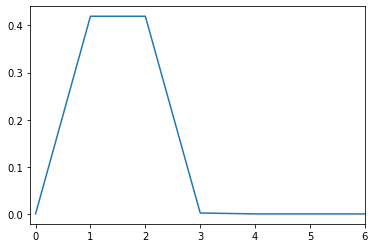

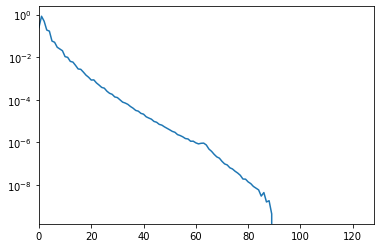

138.30878542537403 0.5918569409942076


In [318]:
plts = spec("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00590883.h5")

Analyzing dataset...
Generating Plots...


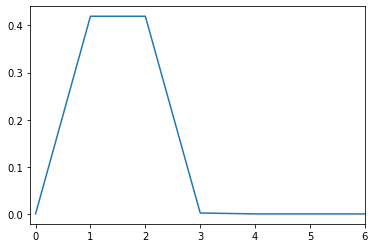

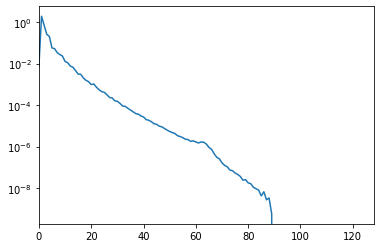

214.01461959777544 0.6788668670140549


In [319]:
plts = spec("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/N2-12832-Eps084restart00636883.h5")

In [393]:
import os
import sys
import glob

print ("Generating file list...")
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/*.h5") 
fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084-0330/*.h5") 
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/*.h5") 

summaryData = []

first = True
for file in fileList:
    specData = hdf.File(file,"r")
    u = specData.get('u')[()]
    v = specData.get('v')[()]
    w = specData.get('w')[()]
    r = specData.get('rho')[()]

    nx = specData.get('nx')[()]
    ny = specData.get('ny')[()]
    nz = specData.get('nz')[()]
    
    time = specData.get('time')[()]

    yBoxScale = specData.get('LMFy')[()]
        
    nu = specData.get('nu')[()]
    diff = specData.get('diff')[()]
    grav = specData.get('grav')[()]
    gradv = specData.get('gradv')[()]
    
    if (first):
        print ("Calculating work arrays...")
        weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
        weights = np.fromfunction(np.vectorize(weightsFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        ksqFxn = lambda k, j, i: j*j + \
                                 ((i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2)**2 + \
                                 (k % (nz/2) - np.floor(2*k/nz)*nz/2)**2
        ksq = np.fromfunction(np.vectorize(ksqFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        first = False
        
    # Kinetic Energy/Diss Calculations
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))

    tmp = eneU + eneV + eneW
    ke = np.multiply(tmp, weights)
    
    keDiss = np.multiply(ke, ksq)
    keDiss = 2 * nu * keDiss
    
    # Potential Energy/Diss Calculations
    eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))
    
    pe = np.multiply(eneR, weights) 
    pe = -grav / gradv * pe
    
    peDiss = np.multiply(pe, ksq)
    peDiss = 2 * diff * peDiss
    
    summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])
    
    print (time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss))

summaryData = np.asarray(summaryData, dtype=np.float32)

Generating file list...
Calculating work arrays...
[540.49847297] 3.746261847837725 0.6450602841509444 0.13244534459974228 0.15745044152377763
[464.38044296] 3.303831078466529 0.8528047888098329 0.18228361406852883 0.2536092715887993
[383.13434361] 3.3964677654285755 0.5829209975706497 0.17559221738944536 0.19512428749981436
[320.68138269] 3.1835902873233977 0.43193433865782016 0.15110618971931866 0.15123351518012013
[759.7917791] 3.0197363931091106 0.5855944268202777 0.16089270025495356 0.21681905471048177
[141.83633112] 3.288059010855148 0.6032372085224944 0.13188782880947417 0.14385333068897224
[693.11275423] 2.9649725661990898 0.6736650345926396 0.1457947045209881 0.189066611419633
[756.15468236] 2.895718381175697 0.5804825958523921 0.14874188640888936 0.19165565197594492
[170.23858516] 3.4966713183380205 0.6112913895906815 0.0955646846555326 0.12122169772428454
[249.92514368] 3.355619065520438 0.5151147761433885 0.16007035005749232 0.1726606637890709
[830.61783656] 3.4199134492900

[517.2630874] 3.104012231640567 0.5316496000786227 0.13913984789687284 0.17664256249995647
[582.83350167] 2.5018874007166314 0.8063319056310896 0.15414532649476748 0.1951040475196073
[447.98360761] 3.522626552978226 0.5475598132098236 0.1300271416923985 0.15232541460892873
[497.92991878] 3.4534277180911563 0.6945708615489383 0.14829913170955644 0.18885066425537042
[304.12172481] 3.067786549678343 0.7487587287507982 0.14869936356666585 0.19944518273891598
[102.97013689] 2.9273220686934183 0.5015779829176991 0.1154286185998313 0.1600006838730264
[129.99968547] 3.4279482555392646 0.5662210718700642 0.1621522115115047 0.17342908546229607
[201.60315206] 3.4545908363995217 0.7192120998794449 0.18934156534814167 0.2780300600438382
[281.30867465] 3.740396676336145 0.509023029579458 0.1396530181894507 0.16451638262195656
[501.51072917] 3.0762179553506566 0.5001138541399304 0.10781597936283954 0.144996960199919
[948.7881467] 3.3158116452229693 0.6621325547031951 0.17907266774348263 0.20523355405

[657.19408558] 3.214680157493385 0.4802872750423467 0.14269719530775893 0.16296514058875342
[356.52402692] 3.5208392170395477 0.43792282536098487 0.08379422046996343 0.10340723729686196
[419.46443652] 3.9782842909411986 0.5407412417921038 0.12231255577644226 0.14347350641556267
[647.88163155] 3.0123044038283107 0.4765017224020454 0.1102274308854524 0.13883188452327008
[877.02552438] 3.3981538735058305 0.5939459807004339 0.18015048717621343 0.19058174093639066
[940.23086848] 3.31654424820337 0.39759761426248186 0.11878835309657268 0.13030853686087765
[584.79035626] 2.4362515533172413 0.6387640531261841 0.14598548636801023 0.15519471857270445
[508.3393408] 3.2265720622746326 0.775762378100552 0.19823771817445945 0.25481366763972507
[492.57731974] 2.761281096239124 0.47283259564224556 0.1311912117996311 0.17535396640229836
[101.01378933] 2.7821576413440114 0.7556348033393803 0.14125763052443266 0.2002625771346574
[275.83589573] 2.99147816821005 0.5877854099493345 0.13920894205119555 0.200

[950.56688819] 3.332343516002754 0.6253314767184033 0.14783419367266015 0.18298823908805137
[503.21188138] 3.2490504806312606 0.5675192223565988 0.14823292030334909 0.18065474816623492
[823.64802996] 3.242413112977871 0.744576341239132 0.18452864814510384 0.24202843069157126
[743.0575352] 3.0509709133527485 0.7732179543903929 0.1469122442567761 0.2144424526382716
[182.54148061] 3.1604818819178027 0.7803299950285585 0.15766756043078506 0.20677773068355923
[680.6638993] 3.14221509832318 0.9001367462273033 0.20162449065461385 0.26758675865922427
[916.84015499] 2.607746017061022 0.5322107498586166 0.18805672557528438 0.2080097782179519
[399.32112718] 3.0735990531649424 0.6524344697100204 0.1628312755075522 0.1773004312775511
[333.33396062] 3.3491244852797344 0.5247451417342686 0.12201877244581968 0.16145872263816696
[528.28774948] 2.891977897768854 0.5443009475290501 0.14176354564052016 0.16609734958956146
[608.46128261] 2.9853430248789703 0.5208083439754186 0.12497809517341946 0.159413265

[858.7286643] 3.2543891516656194 0.6976707708721631 0.1764657676219241 0.24494577862947917
[156.23817114] 3.5354872063572356 0.6669333629656086 0.14982719454374752 0.1760387529416453
[221.17326527] 3.290357171717017 0.49102090273640275 0.10966315339351665 0.14035268927374767
[359.96906642] 3.950210230295446 0.6731847163980331 0.14550111774810406 0.17872659312348887
[562.94234313] 2.9974225131628813 0.5463769699632501 0.15601177563558305 0.19710884865256714
[644.33232813] 3.2291951218071975 0.6750928802771303 0.1594292060883305 0.21127757333536026
[925.87220711] 2.7693767244375644 0.705950536751163 0.13789432798439802 0.1952190000302064
[434.71540683] 2.7253444141279926 0.845037389099472 0.20534510172027345 0.2834503176233975
[368.86460243] 2.6956118644504654 0.571892327087132 0.13661291953875976 0.22129771506558776
[880.40074038] 2.886143216699998 0.7689182101674852 0.17006575427295756 0.2340242325428895
[217.34313672] 3.1781093209774616 0.8069667772555091 0.17705085221965902 0.2169260

[215.48277415] 3.4640877963991015 0.6887947790735437 0.1079118938937321 0.14843116780779594
[115.4998225] 2.8904554552250854 0.5673264431404568 0.13099826146450352 0.19664618576515897
[709.22122977] 3.1900341552277798 0.6048272314330222 0.17123301211111774 0.2097150354886847
[785.8698462] 3.3185589634327393 0.7591360029556168 0.23878391459495504 0.29235851455692996
[289.73402673] 3.549431059303781 0.6057001767849253 0.13650873273426628 0.17508791045081257
[370.84418538] 3.1309848601315284 0.4374695721111157 0.11220488298410762 0.13296747243772578
[432.93699494] 3.20434108224575 0.6811199487944802 0.17821958094969229 0.23109366062157766
[878.72400181] 3.164048528046721 0.6792105733471427 0.17947348873951408 0.2391740180806092
[358.31863596] 3.865457610194926 0.5352461006830445 0.11400648773509642 0.15044483734012282
[642.61760257] 3.40749957286058 0.626667390888943 0.17029374724976507 0.1864467367647405
[564.74005858] 2.886787481459968 0.7290397793963657 0.15910659822642842 0.2126454531

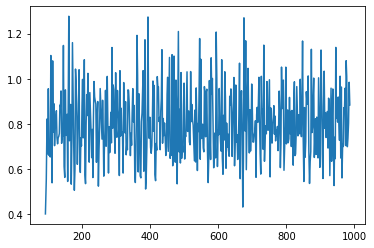

In [395]:
plt.plot(sData['times'][1:], sData['keDiss'][1:] + sData['peDiss'][1:])
plt.show()

In [398]:
import pandas as pd 
sData = pd.DataFrame(summaryData,columns=['times','ke','keDiss','pe','peDiss']) 

sData = sData.sort_values(by=['times'])

(sData['keDiss'][10:].sum() + sData['peDiss'][10:].sum())/(len(sData)-10)

sData = sData.to_numpy()

%store sData

Stored 'sData' (ndarray)


In [34]:
import os
import sys
import glob

print ("Generating file list...")
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/*.h5") 
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00595883.h5") 
fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084-0330/N2-12832-Eps084restart00622883.h5") 

summaryData = []
fileCnt = 0

first = True
for file in fileList:
    specData = hdf.File(file,"r")
    u = specData.get('u')[()]
    v = specData.get('v')[()]
    w = specData.get('w')[()]
    r = specData.get('rho')[()]

    nx = specData.get('nx')[()]
    ny = specData.get('ny')[()]
    nz = specData.get('nz')[()]
    
    time = specData.get('time')[()]

    yBoxScale = specData.get('LMFy')[()]
        
    nu = specData.get('nu')[()]
    diff = specData.get('diff')[()]
    grav = specData.get('grav')[()]
    gradv = specData.get('gradv')[()]
    
    if (first):
        print ("Calculating work arrays...")
        weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
        weights = np.fromfunction(np.vectorize(weightsFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        ksqFxn = lambda k, j, i: j*j + \
                                 ((i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2)**2 + \
                                 (k % (nz/2) - np.floor(2*k/nz)*nz/2)**2
        ksq = np.fromfunction(np.vectorize(ksqFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        kxFxn = lambda k, j, i: j
        kx = np.fromfunction(np.vectorize(kxFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        kyFxn = lambda k, j, i: (i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2
        ky = np.fromfunction(np.vectorize(kyFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        kzFxn = lambda k, j, i: k % (nz/2) - np.floor(2*k/nz)*nz/2
        kz = np.fromfunction(np.vectorize(kzFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
    # Kinetic Energy/Diss Calculations
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))

    tmp = eneU + eneV + eneW
    ke = np.multiply(tmp, weights)
    
    keDiss = np.multiply(ke, ksq)
    keDiss = 2 * nu * keDiss
    
    # Potential Energy/Diss Calculations
    eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))
    
    pe = np.multiply(eneR, weights) 
    pe = -grav / gradv * pe
    
    peDiss = np.multiply(pe, ksq)
    peDiss = 2 * diff * peDiss
    
    summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])
    
    stratData = pd.DataFrame(np.transpose([kx.flatten(), ky.flatten(), kz.flatten(), weights.flatten(), 
                              ksq.flatten(), eneU.flatten(), eneV.flatten(), eneW.flatten(), 
                              eneR.flatten()]), columns=['kx','ky','kz','weight','ksq','eneU','eneV','eneW','eneR'])
    
    stratData['keSpec'] = (stratData['eneU'] + stratData['eneV'] + stratData['eneW']) * stratData['weight']
    stratData['kxAbs'] = np.abs(stratData['kx'])
    stratData['kyAbs'] = np.abs(stratData['ky'])
    stratData['kzAbs'] = np.abs(stratData['kz'])
    
    if (first):
        kxBin = stratData.groupby(["kxAbs"]).sum()
        kyBin = stratData.groupby(["kyAbs"]).sum()
        kzBin = stratData.groupby(["kzAbs"]).sum()
        first = False
    else:
        kxBin = kxBin.add(stratData.groupby(["kxAbs"]).sum()).reset_index()
        kyBin = kyBin.add(stratData.groupby(["kyAbs"]).sum()).reset_index()
        kzBin = kzBin.add(stratData.groupby(["kzAbs"]).sum()).reset_index()

    fileCnt = fileCnt + 1
    print (time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss))

summaryData = np.asarray(summaryData, dtype=np.float32)

Generating file list...
Calculating work arrays...
[188.03573188] 3.446802734777477 0.5919564876881527 0.15843306702399332 0.1832069140326989


In [454]:
stratData['keSpec'] = stratData['eneU'] + stratData['eneV'] + stratData['eneW'] * stratData['weight']
stratData['kxAbs'] = np.abs(stratData['kx'])
stratData['kyAbs'] = np.abs(stratData['ky'])
stratData['kzAbs'] = np.abs(stratData['kz'])
kxBin = stratData.groupby(["kxAbs"]).sum()
kyBin = stratData.groupby(["kyAbs"]).sum()
kzBin = stratData.groupby(["kzAbs"]).sum()

In [15]:
n12832kx = kxBin
n12832ky = kyBin
n12832kz = kzBin

#n128128kx = kxBin
#n128128ky = kyBin
#n128128kz = kzBin

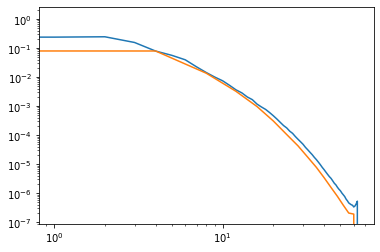

In [24]:
#plt.plot(n128128kx['keSpec'])
plt.plot(n128128ky['keSpec'])
#plt.plot(n128128kz['keSpec'])
#plt.plot(n12832kx['keSpec'])
plt.plot(n12832ky['keSpec']/4.0)
#plt.plot(n12832kz['keSpec'])
plt.yscale('log')
plt.xscale('log')
plt.show()

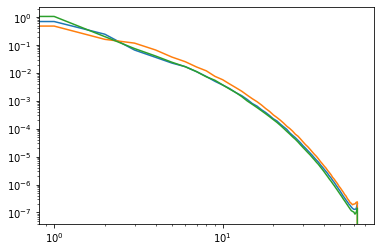

In [455]:
plt.plot(kxBin['keSpec'])
plt.plot(kyBin['keSpec'])
plt.plot(kzBin['keSpec'])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [22]:
n128128ky

,kx,ky,kz,weight,ksq,eneU,eneV,eneW,eneR,keSpec,kxAbs,kzAbs
kyAbs,,,,,,,,,,,,
0.0,258048.0,0.0,-4096.0,16256.0,22110208.0,5.864841e-01,1.065426e-02,2.409688e-01,3.092356e-03,1.237001e+00,258048.0,262144.0
1.0,516096.0,0.0,-8192.0,32512.0,44236800.0,8.998619e-02,3.192206e-02,3.191274e-02,9.707362e-03,2.394252e-01,516096.0,524288.0
2.0,516096.0,0.0,-8192.0,32512.0,44285952.0,7.077655e-02,2.705655e-02,7.499437e-02,8.697705e-03,2.464266e-01,516096.0,524288.0
3.0,516096.0,0.0,-8192.0,32512.0,44367872.0,3.205176e-02,2.172362e-02,4.325187e-02,4.470212e-03,1.567068e-01,516096.0,524288.0
4.0,516096.0,0.0,-8192.0,32512.0,44482560.0,1.681469e-02,9.323476e-03,1.976658e-02,3.051171e-03,7.935552e-02,516096.0,524288.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60.0,516096.0,0.0,-8192.0,32512.0,103202816.0,7.765140e-08,1.146341e-08,8.221588e-08,6.740934e-08,3.353847e-07,516096.0,524288.0
61.0,516096.0,0.0,-8192.0,32512.0,105185280.0,8.554038e-08,1.199703e-08,8.791380e-08,7.632973e-08,3.619714e-07,516096.0,524288.0
62.0,516096.0,0.0,-8192.0,32512.0,107200512.0,1.031225e-07,1.354666e-08,1.024893e-07,8.704327e-08,4.287674e-07,516096.0,524288.0


In [23]:
n12832ky

,kx,ky,kz,weight,ksq,eneU,eneV,eneW,eneR,keSpec,kxAbs,kzAbs
kyAbs,,,,,,,,,,,,
0.0,258048.0,0.0,-4096.0,16256.0,22110208.0,1.106749e+00,2.091046e-02,6.941304e-01,1.025188e-02,2.850525e+00,258048.0,262144.0
4.0,516096.0,0.0,-8192.0,32512.0,44482560.0,6.265363e-02,3.584689e-02,9.638078e-02,6.609058e-03,3.188934e-01,516096.0,524288.0
8.0,516096.0,0.0,-8192.0,32512.0,45268992.0,1.017528e-02,5.631155e-03,1.339012e-02,2.472625e-03,5.454445e-02,516096.0,524288.0
12.0,516096.0,0.0,-8192.0,32512.0,46579712.0,2.971984e-03,1.123277e-03,2.673388e-03,9.823980e-04,1.298544e-02,516096.0,524288.0
16.0,516096.0,0.0,-8192.0,32512.0,48414720.0,9.450262e-04,3.023400e-04,7.471064e-04,3.952943e-04,3.875642e-03,516096.0,524288.0
20.0,516096.0,0.0,-8192.0,32512.0,50774016.0,3.098294e-04,8.389283e-05,2.371421e-04,1.661547e-04,1.229517e-03,516096.0,524288.0
24.0,516096.0,0.0,-8192.0,32512.0,53657600.0,1.083764e-04,2.626902e-05,8.021311e-05,8.237634e-05,4.207942e-04,516096.0,524288.0
28.0,516096.0,0.0,-8192.0,32512.0,57065472.0,4.713961e-05,9.655712e-06,3.115375e-05,4.041862e-05,1.715718e-04,516096.0,524288.0
32.0,516096.0,0.0,-8192.0,32512.0,60997632.0,1.973524e-05,3.576267e-06,1.228551e-05,1.903001e-05,6.947345e-05,516096.0,524288.0


In [36]:
kyBin/4.0

,kx,ky,kz,weight,ksq,eneU,eneV,eneW,eneR,keSpec,kxAbs,kzAbs
kyAbs,,,,,,,,,,,,
0.0,64512.0,0.0,-1024.0,4064.0,5527552.0,3.064149e-01,1.011326e-02,1.659179e-01,1.540769e-03,7.350849e-01,64512.0,65536.0
4.0,129024.0,0.0,-2048.0,8128.0,11120640.0,2.562706e-02,1.428055e-02,1.487518e-02,2.572877e-03,1.016689e-01,129024.0,131072.0
8.0,129024.0,0.0,-2048.0,8128.0,11317248.0,4.695460e-03,1.729414e-03,3.642887e-03,9.584900e-04,1.839983e-02,129024.0,131072.0
12.0,129024.0,0.0,-2048.0,8128.0,11644928.0,1.205146e-03,3.493580e-04,7.446899e-04,2.732694e-04,4.386756e-03,129024.0,131072.0
16.0,129024.0,0.0,-2048.0,8128.0,12103680.0,3.127860e-04,9.804543e-05,2.641206e-04,1.100758e-04,1.296411e-03,129024.0,131072.0
20.0,129024.0,0.0,-2048.0,8128.0,12693504.0,1.476694e-04,3.130267e-05,8.783331e-05,5.403211e-05,5.162957e-04,129024.0,131072.0
24.0,129024.0,0.0,-2048.0,8128.0,13414400.0,5.135369e-05,1.186091e-05,3.684240e-05,2.533002e-05,1.946817e-04,129024.0,131072.0
28.0,129024.0,0.0,-2048.0,8128.0,14266368.0,2.067134e-05,4.932773e-06,1.646010e-05,1.270146e-05,8.225662e-05,129024.0,131072.0
32.0,129024.0,0.0,-2048.0,8128.0,15249408.0,9.144160e-06,1.927011e-06,7.743616e-06,6.895366e-06,3.670490e-05,129024.0,131072.0


In [33]:
(n12832kz.add(n12832kx)['keSpec']/2.0).iloc[10:20]

10.0    0.004302
11.0    0.003268
12.0    0.002033
13.0    0.001588
14.0    0.001100
15.0    0.000844
16.0    0.000626
17.0    0.000498
18.0    0.000351
19.0    0.000287
Name: keSpec, dtype: float64